# Book Rating

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import collections

random.seed(42)
np.random.seed(42)

## Download Data

In [5]:
path = '/opt/ml/data/'

users = pd.read_csv(path+'users.csv')
books = pd.read_csv(path+'books.csv')
train_ratings = pd.read_csv(path+'train_ratings.csv')
test_ratings = pd.read_csv(path+'test_ratings.csv')

print('users shape: ', users.shape)
print('books shape: ', books.shape)
print('train_ratings shape: ', train_ratings.shape)
print('test_ratings shape: ', test_ratings.shape)

users shape:  (68092, 3)
books shape:  (149570, 10)
train_ratings shape:  (306795, 3)
test_ratings shape:  (76699, 3)


## 1. users

In [6]:
users.head()

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [8]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,68092.0,139381.329539,80523.969862,8.0,69008.75,138845.5,209388.25,278854.0
age,40259.0,36.069873,13.842571,5.0,25.00,34.0,45.00,99.0


In [9]:
# 고유값 개수
users['user_id'].nunique()

68092

In [10]:
users.isna().sum()/len(users)

user_id     0.000000
location    0.000000
age         0.408756
dtype: float64

timmins, ontario, canada -> city, state, country

In [11]:
users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거

users['location_city'] = users['location'].apply(lambda x: x.split(',')[0].strip())
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1].strip())
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2].strip())

/tmp/ipykernel_27465/1617927211.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거


In [12]:
# 특수문자 제거하면서, np.nan -> na 그래서 다시 na -> np.nan
users = users.replace('na', np.nan)
# , , , 인 경우도 결측값 처리
users = users.replace('', np.nan)

In [13]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state       3254
location_country     2124
dtype: int64

In [14]:
# country는 없고, city 있는 경우 처리
modify_location = users[(users['location_country'].isna())&(users['location_city'].notnull())]['location_city'].values

location_list = []
for location in modify_location:
    try:
        right_location = users[(users['location'].str.contains(location))&(users['location_country'].notnull())]['location'].value_counts().index[0]
        location_list.append(right_location)
    except:
        pass

In [15]:
for location in location_list:
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_state'] = location.split(',')[1]
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_country'] = location.split(',')[2]

In [16]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state       1132
location_country      271
dtype: int64

In [17]:
# location_state 결측값인 행 확인
users.loc[users['location_state'].isna()].head(10)

,user_id,location,age,location_city,location_state,location_country
2,11676,"na,na,na",NaN,NaN,NaN,NaN
633,271622,"malmok,na,aruba",NaN,malmok,NaN,aruba
867,29259,"mtairy,,usa",39.0,mtairy,NaN,usa
911,34994,"brussels,na,belgium",54.0,brussels,NaN,belgium
919,36656,"manila,na,philippines",28.0,manila,NaN,philippines
939,38418,"portoalegre,na,brazil",25.0,portoalegre,NaN,brazil
1023,50858,"nacogdoches,,usa",19.0,nacogdoches,NaN,usa
1086,59756,"belgrade,na,yugoslavia",25.0,belgrade,NaN,yugoslavia
1107,63074,"istanbul,na,turkey",44.0,istanbul,NaN,turkey
1145,67994,"hobart,na,australia",57.0,hobart,NaN,australia


In [18]:
# state는 없는데, city는 있는 경우 처리
modify_location = users[(users['location_state'].isna())&(users['location_city'].notnull())]['location_city'].values

location_list = []
for location in modify_location:
    try:
        right_location = users[(users['location'].str.contains(location))&(users['location_state'].notnull())]['location'].value_counts().index[0]
        location_list.append(right_location)
    except:
        pass

In [19]:
for location in location_list:
  users.loc[users[users['location_city']==location.split(',')[0]].index,'location_state'] = location.split(',')[1]
  users.loc[users[users['location_city']==location.split(',')[0]].index,'location_country'] = location.split(',')[2]

In [20]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state        606
location_country      266
dtype: int64

<Axes: >

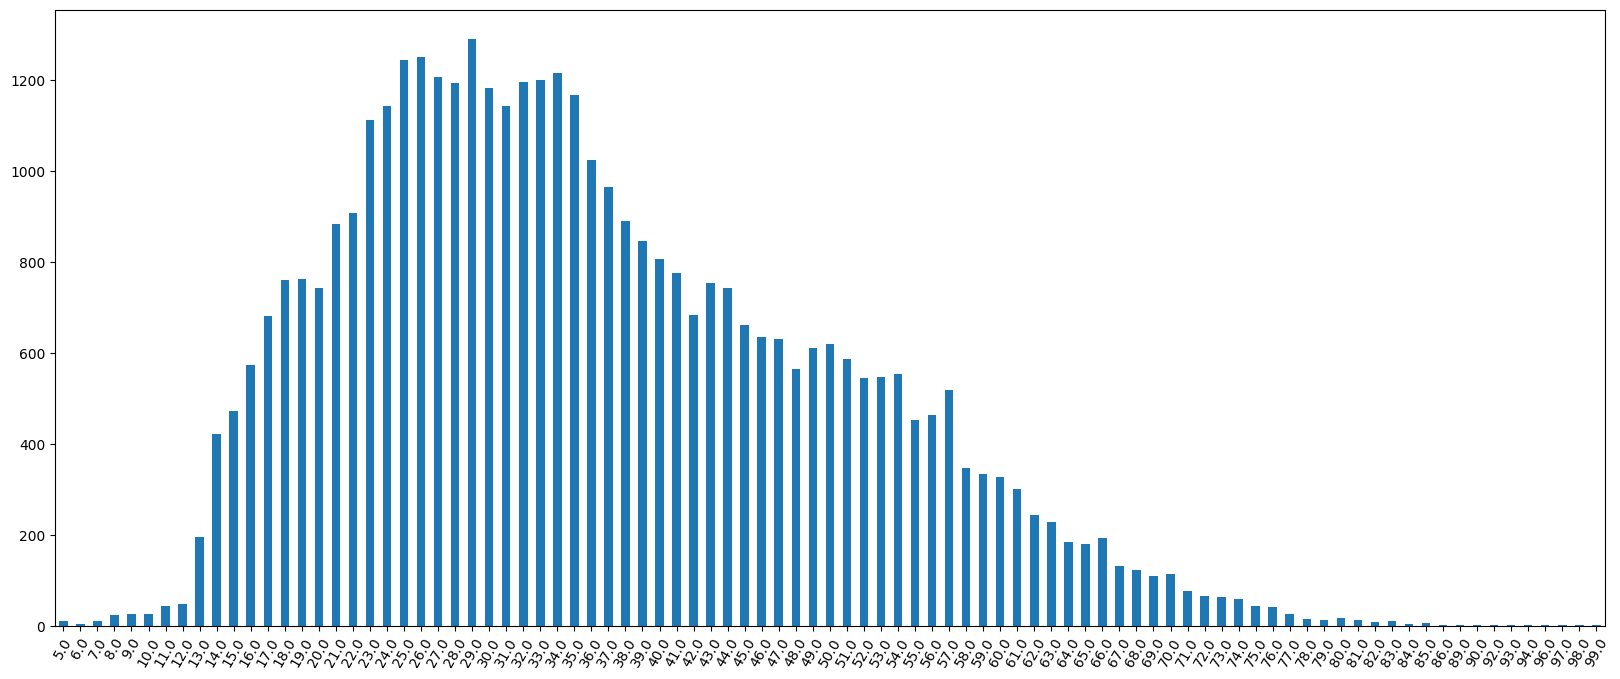

In [21]:
plt.figure(figsize=(20, 8))
users['age'].value_counts().sort_index().plot(kind='bar', rot=60)

In [22]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state        606
location_country      266
dtype: int64

In [23]:
temp_age_series = pd.Series(np.random.normal(loc=users.age.mean(), scale=users.age.std(), size=users.user_id[users.age.isna()].count()))
print("Statistics of values in \'users.age\'\n",users.age.describe(),"\n")
print("Statistics of values we are going to use to fill NaN \n",temp_age_series.describe(),"\n")
print("Negative values in \'temp_age_seires\':", temp_age_series[temp_age_series<0].count(),"\n")
print("As we can see the destribution doesnt change a lot. There are some negative values thought (around 600 of them).\n")

Statistics of values in 'users.age'
 count    40259.000000
mean        36.069873
std         13.842571
min          5.000000
25%         25.000000
50%         34.000000
75%         45.000000
max         99.000000
Name: age, dtype: float64 

Statistics of values we are going to use to fill NaN 
 count    27833.000000
mean        36.099890
std         13.822404
min        -18.226233
25%         26.746352
50%         36.121030
75%         45.433377
max         98.071916
dtype: float64 

Negative values in 'temp_age_seires': 135 

As we can see the destribution doesnt change a lot. There are some negative values thought (around 600 of them).



In [24]:
# take the abs value of temp_age_series
pos_age_series=np.abs(temp_age_series)

In [25]:
def age_map(x: int) -> int:
    x = int(x)
    if x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    else: 
        return 6

In [26]:
users['age'] = users[users['age'].notnull()]['age'].apply(age_map)

<Axes: >

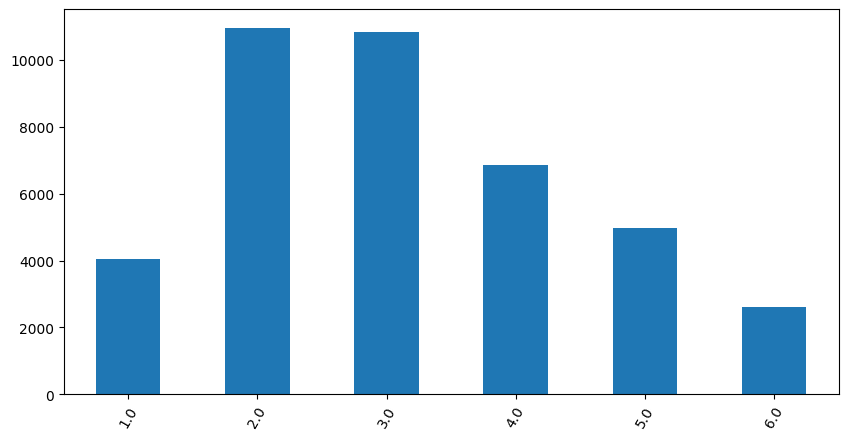

In [27]:
plt.figure(figsize=(10, 5))
users['age'].value_counts().sort_index().plot(kind='bar', rot=60)

In [28]:
users['age'].value_counts(normalize=True)

2.0    0.272461
3.0    0.268859
4.0    0.170347
5.0    0.123202
1.0    0.100599
6.0    0.064532
Name: age, dtype: float64

In [29]:
# age가 결측값인 행 대부분 location_country 결측값 아님
users[users['location_country'].notnull() & users['age'].isna()]

,user_id,location,age,location_city,location_state,location_country
0,8,"timmins,ontario,canada",NaN,timmins,ontario,canada
6,116866,"ottawa,,",NaN,ottawa,ontario,canada
7,123629,"kingston,ontario,canada",NaN,kingston,ontario,canada
9,200273,"comber,ontario,canada",NaN,comber,ontario,canada
10,210926,"guelph,ontario,canada",NaN,guelph,ontario,canada
...,...,...,...,...,...,...
68074,277479,"mauldin,southcarolina,usa",NaN,mauldin,southcarolina,usa
68075,277514,"munic,na,germany",NaN,munic,NaN,germany
68084,278248,"na,manitoba,canada",NaN,NaN,manitoba,canada
68085,278260,"burlington,massachusetts,usa",NaN,burlington,ontario,canada


In [30]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state        606
location_country      266
dtype: int64

## 2. books

In [31]:
books.head(n=3)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg


In [32]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149570 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


In [33]:
# book_author, language, category, summary, img_path NaN
books.isna().sum()

isbn                       0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
dtype: int64

### Books Title

In [34]:
print(books[(books.duplicated(['book_title', 'book_author']))][['book_author', 'book_title']].value_counts().head())

book_author              book_title                    
Mark Twain               Adventures of Huckleberry Finn    14
Frances Hodgson Burnett  The Secret Garden                 13
Jane Austen              Pride and Prejudice               13
Emily Bronte             Wuthering Heights                 12
Bram Stoker              Dracula                           11
dtype: int64


### Year of Publication

In [35]:
sorted(list(set(books['year_of_publication'])))

[1376.0,
 1378.0,
 1806.0,
 1900.0,
 1901.0,
 1902.0,
 1904.0,
 1906.0,
 1908.0,
 1911.0,
 1920.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0]

<Axes: >

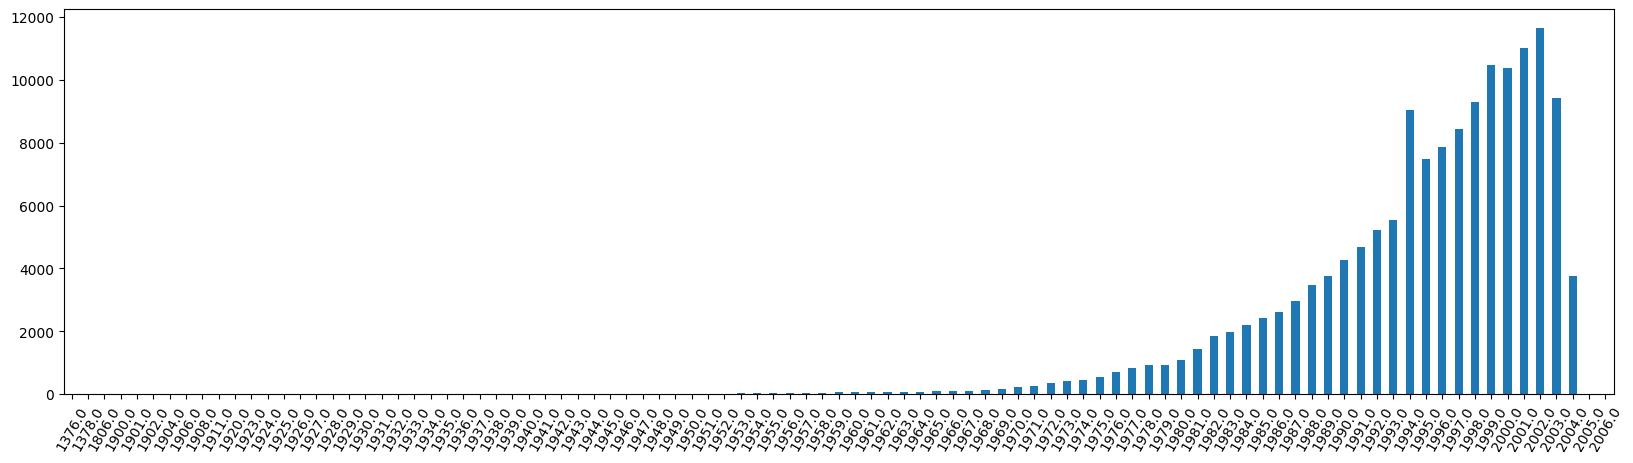

In [36]:
plt.figure(figsize=(20, 5))
books['year_of_publication'].value_counts().sort_index().plot(kind='bar', rot=60)

### Publisher

In [37]:
publisher_dict=(books['publisher'].value_counts()).to_dict()
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])

publisher_count_df = publisher_count_df.sort_values(by=['count'], ascending = False)

In [38]:
publisher_count_df.head()

,publisher,count
0,Harlequin,3005
1,Ballantine Books,2322
2,Pocket,2274
3,Penguin Books,1943
4,Bantam Books,1938


In [39]:
books['publisher'].nunique() 

11571

In [40]:
books[books['isbn'].apply(lambda x: x[:4])=='0140']['publisher'].unique()

array(['Penguin Books', 'Penguin Books Ltd', 'Puffin Books',
       'Penguin USA (Paper)', 'Penguin USA', 'Puffin',
       'Penguin Putnam~trade', 'Penguin Putnam~mass',
       'Penguin/Puffin Mass Market (Mm)', 'Viking Books',
       'Penguin Books Australia Ltd', 'Penguin Uk',
       'Scott Foresman (Pearson K-12)',
       'Penguin Putnam Books for Young Readers',
       'French & European Pubns', 'Viking Penguin', 'Arkana',
       'Penguin Highbridge Audio', 'Penguin (Non-Classics)',
       'Penguin Books, Limited (UK)', 'Viking Press', 'Penguin U S A',
       'Penguin/Puffin Mass Market', 'Select Penguin (Mm)',
       'Penguin Putnam', 'Penguin Books India', 'Select Penguin',
       'Penguin Books Australia Ltd.', 'Viking Penguin Inc',
       'Penguin Audiobooks', 'Studio Books', 'Penguin',
       'Hyperion Books for Children', 'Putnam Pub Group', 'Penguin India',
       'Compass Books', 'Penguin Putnam~childrens Hc',
       'Penguin in association with Secker and Warburg', 'Time O

In [41]:
modify_list = publisher_count_df[publisher_count_df['count']>1].publisher.values

In [42]:
for publisher in modify_list:
    try:
        number = books[books['publisher']==publisher]['isbn'].apply(lambda x: x[:4]).value_counts().index[0]
        right_publisher = books[books['isbn'].apply(lambda x: x[:4])==number]['publisher'].value_counts().index[0]
        books.loc[books[books['isbn'].apply(lambda x: x[:4])==number].index,'publisher'] = right_publisher
    except: 
        pass

In [43]:
books['publisher'].nunique()

1523

In [44]:
books['publisher']

0                          Collins
1                        Perennial
2             Farrar Straus Giroux
3                 Putnam Pub Group
4         Berkley Publishing Group
                    ...           
149565                      Pocket
149566              Broadway Books
149567         Bridge Publications
149568              Pub Group West
149569                  Soho Press
Name: publisher, Length: 149570, dtype: object

publisher 정제, 불용어 제거

In [45]:
import re
books['publisher'] = books['publisher'].apply(lambda x: re.sub('[\W]+',' ',x).strip())

In [46]:
books[books['publisher'].str.contains('Mm')]['publisher']

Series([], Name: publisher, dtype: object)

In [274]:
books['publisher'] = books['publisher'].apply(lambda x: ' '.join([w for w in x.split() if w not in ['Mm']]))

In [275]:
# Pub Group Publishing Books Crop. Press Corporation Inc Co.  (Mm) Corp , Ltd House Publishers Publisher Verlag
publisher_stopwords = ['pub', 'group', 'publishing', 'books', 'crop', 'press', 'inc', 'co', 'mm', 'corp', 'ltd', 'house', 'publishers', 'publisher', 'verlag', 'company', 'com', 'book', 'corporation']

books['publisher'] = books['publisher'].apply(lambda x: ' '.join([w.lower() for w in x.split() if w.lower() not in publisher_stopwords]).strip())

In [276]:
books['publisher'].nunique()
# 1523 -> 1473

1473

In [57]:
publisher_df = books['publisher'].value_counts().reset_index()
publisher_df

,index,publisher
0,Pocket,7306
1,Harlequin,5268
2,Bantam Books,4815
3,St Martin s Press,4043
4,Vintage Books USA,3822
...,...,...
1517,Oh Editions,1
1518,Saur,1
1519,Rossmen,1
1520,Tascabili Economici Newton,1


In [59]:
others_list = publisher_df[publisher_df['publisher'] < 2]['index'].values
others_list[:10]

array(['Corbaccio', 'C Weise Verlag', 'P Horay', 'Europa Lehrmittel',
       'Bulaaq', 'KrÃ Â ner', 'Iwanami Shoten', 'Katholisches Bibelwerk',
       'Harpercollins P', 'International Books'], dtype=object)

In [60]:
books.loc[books[books['publisher'].isin(others_list)].index, 'publisher'] = 'others'

In [67]:
books.publisher.nunique()

940

In [61]:
books_v5_merge = pd.read_csv('../data/books_v5_merge.csv')

In [64]:
books_v5_merge.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,summary,img_path,category,summary_topic,category_topic
0,0002005018,clara callan,richard bruce wright,2001.0,collins,http://images.amazon.com/images/P/0002005018.0...,en,in a small town in canada clara callan relucta...,images/0002005018.01.THUMBZZZ.jpg,fiction1,-1.0,108.0
1,0060973129,decision in normandy,carlo deste,1991.0,perennial,http://images.amazon.com/images/P/0060973129.0...,en,here for the first time in paperback is an out...,images/0060973129.01.THUMBZZZ.jpg,fiction1,-1.0,68.0
2,0374157065,flu the story of the great influenza pandemic ...,gina bari kolata,1999.0,farrar straus giroux,http://images.amazon.com/images/P/0374157065.0...,en,describes the great flu epidemic of 1918 an ou...,images/0374157065.01.THUMBZZZ.jpg,fiction1,131.0,6.0
3,0399135782,the kitchen god s wife,amy tan,1991.0,putnam pub group,http://images.amazon.com/images/P/0399135782.0...,en,a chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg,fiction1,31.0,33.0
4,0425176428,what if the world s foremost military historia...,robert cowley,2000.0,berkley publishing group,http://images.amazon.com/images/P/0425176428.0...,en,essays by respected military historians includ...,images/0425176428.01.THUMBZZZ.jpg,fiction1,-1.0,21.0


In [69]:
books_v5_merge.publisher = books.publisher

In [73]:
books_v5_merge.publisher.nunique()

940

### Category & Summary

In [36]:
import re

# \W non word 
books.loc[books[books['category'].notnull()].index, 'category'] = books[books['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())
books.loc[books[books['summary'].notnull()].index, 'summary'] = books[books['summary'].notnull()]['summary'].apply(lambda x: re.sub('[\W]+',' ',x).strip())

In [37]:
books['category'].value_counts()

Fiction                                            32956
Juvenile Fiction                                    5804
Biography Autobiography                             3320
History                                             1925
Religion                                            1818
                                                   ...  
Eschatology                                            1
Dogsledding                                            1
Brenner Simon Fictitious character                     1
Gone with the wind Motion picture 1939                 1
Authors Canadian English 20th century Biography        1
Name: category, Length: 4137, dtype: int64

In [38]:
# category 모두 소문자
books['category'] = books['category'].str.lower()
books['category'].value_counts()

fiction                                            33016
juvenile fiction                                    5835
biography autobiography                             3326
history                                             1927
religion                                            1818
                                                   ...  
brenner simon fictitious character                     1
gone with the wind motion picture 1939                 1
disguise                                               1
country lawyers                                        1
authors canadian english 20th century biography        1
Name: category, Length: 4105, dtype: int64

In [39]:
books['category'].nunique()

4105

In [201]:
category_df = pd.DataFrame(books['category'].value_counts()).reset_index()
category_df.columns = ['category','count']
category_df.head(n=10)

,category,count
0,fiction,33016
1,juvenile fiction,5835
2,biography autobiography,3326
3,history,1927
4,religion,1818
5,juvenile nonfiction,1418
6,social science,1231
7,humor,1161
8,body mind spirit,1113
9,business economics,1073


In [696]:
import nltk
nltk.download('stopwords') # 불용어
nltk.download('wordnet')

stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
print(len(stopwords))

179


[nltk_data] Downloading package stopwords to /opt/ml/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /opt/ml/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [697]:
summary_corpus = books[~books.duplicated(subset='summary', keep='first') & books['summary'].notnull()]['summary']
summary_corpus = summary_corpus.apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.split() if w.lower() not in stopwords]))

summary_corpus = summary_corpus.to_list()
print(summary_corpus[:10])
print(len(summary_corpus))

['small town Canada Clara Callan reluctantly take leave sister Nora bound New York', 'first time paperback outstanding military history offer dramatic new perspective Allied campaign began invasion Day beach Normandy Nationa advertising Military History', 'Describes great flu epidemic 1918 outbreak killed forty million people worldwide discus effort scientist public health official understand prevent another lethal pandemic', 'Chinese immigrant convinced dying threatens celebrate Chinese New Year unburdening everybody 39 hidden truth thus prompting series comic misunderstanding', 'Essays respected military historian including Stephen Ambrose David McCullough James McPherson John Keegan consider consequence history turned differently weather Day worse', 'back print Ann Beattie 39 finest short story collection reissued accompany publication latest novel quot Doctor 39 House', 'Another story based fictional rural town Miramichi', 'eye opening well researched examination mankind 39 oldest 

In [698]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [701]:
from bertopic import BERTopic 

topic_model = BERTopic(language="multilingual", calculate_probabilities=True, nr_topics=350, verbose=True)
topics, probs = topic_model.fit_transform(summary_corpus)

Batches: 100%|██████████| 2486/2486 [00:46<00:00, 53.82it/s]
2023-04-14 22:10:07,259 - BERTopic - Transformed documents to Embeddings
2023-04-14 22:11:11,093 - BERTopic - Reduced dimensionality
2023-04-14 22:29:58,963 - BERTopic - Clustered reduced embeddings
2023-04-14 22:30:08,345 - BERTopic - Reduced number of topics from 448 to 350


In [705]:
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name
0,-1,46654,-1_39_quot_life_story
1,0,2198,0_murder_killer_detective_police
2,1,1414,1_god_bible_jesus_prayer
3,2,905,2_alien_planet_space_earth
4,3,762,3_dragon_evil_wizard_magic
...,...,...,...
345,344,10,344_foreign_policy_international_relation
346,345,10,345_pulitzer_prize_wapshot_middlesex
347,346,10,346_klatsand_independently_aldera_earthsea
348,347,10,347_stromberg_mystery_fourchet_penzler


In [706]:
# Count 컬럼 값 모두 합하면, category corpus 개수
topic_model.get_topic_info()['Count'].sum()

79549

In [707]:
topic_model.get_topic(3)

[('dragon', 0.02213896328782004),
 ('evil', 0.01878663387730249),
 ('wizard', 0.017752732400561844),
 ('magic', 0.014531315569013466),
 ('kingdom', 0.013201400453736802),
 ('power', 0.012456039760149156),
 ('magical', 0.011148336006618883),
 ('elf', 0.01094946080994288),
 ('sorcerer', 0.010459152852863089),
 ('prince', 0.010287916453975237)]

In [708]:
without_stopwords_summary_corpus = books[~books.duplicated(subset='summary') & books['summary'].notnull()]['summary']
summary_topic_modeling = pd.DataFrame({'summary': without_stopwords_summary_corpus, 'summary_topic' : topics})
summary_topic_modeling.head()

,summary,summary_topic
0,In a small town in Canada Clara Callan relucta...,-1
1,Here for the first time in paperback is an out...,-1
2,Describes the great flu epidemic of 1918 an ou...,131
3,A Chinese immigrant who is convinced she is dy...,31
4,Essays by respected military historians includ...,-1


In [709]:
summary_topic_modeling.shape

(79549, 2)

In [710]:
topic_info = topic_model.get_topic_info()[['Topic', 'Name']]
topic_info.columns = ['summary_topic', 'summary_topic_name']
summary_topic_modeling = pd.merge(topic_info, summary_topic_modeling, on='summary_topic', how='inner')

In [711]:
summary_topic_modeling.shape

(79549, 3)

In [712]:
summary_topic_modeling.to_csv('../data/summary_topic_modeling_350.csv', index=False)

In [715]:
summary_topic_modeling.tail()

,summary_topic,summary_topic_name,summary
79544,348,348_nutcracker_kissyfur_wooden_puppet,Carved from a piece of pine by a woodcarver na...
79545,348,348_nutcracker_kissyfur_wooden_puppet,Tells the stories of how Kissyfur and his fath...
79546,348,348_nutcracker_kissyfur_wooden_puppet,After hearing how her toy nutcracker got his u...
79547,348,348_nutcracker_kissyfur_wooden_puppet,Presents the adventures of Pinocchio a mischie...
79548,348,348_nutcracker_kissyfur_wooden_puppet,After hearing how her toy nutcracker got his u...


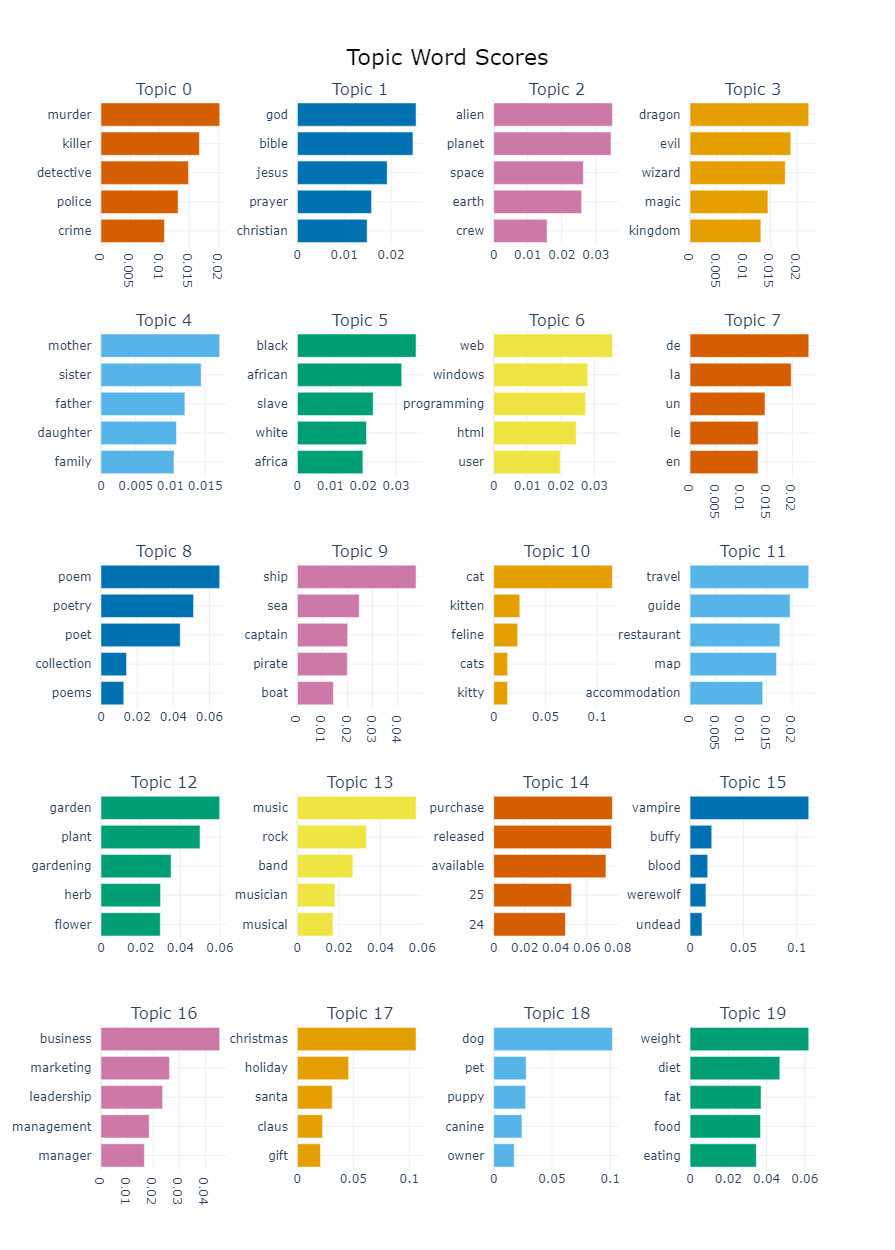

In [716]:
topic_model.visualize_barchart(top_n_topics=20)

In [717]:
category_corpus = books[~books.duplicated(subset='category', keep='first') & books['category'].notnull()]['category']
category_corpus = category_corpus.apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords]))

category_corpus = category_corpus.to_list()
print(len(category_corpus))

4105


In [725]:
from bertopic import BERTopic

category_topic_model = BERTopic(language="multilingual", calculate_probabilities=True, verbose=True)
topics, probs = category_topic_model.fit_transform(category_corpus)

Batches: 100%|██████████| 129/129 [00:01<00:00, 68.68it/s]
2023-04-14 22:36:03,313 - BERTopic - Transformed documents to Embeddings
2023-04-14 22:36:11,638 - BERTopic - Reduced dimensionality
2023-04-14 22:36:13,542 - BERTopic - Clustered reduced embeddings


In [726]:
category_topic_model.get_topic_info()

,Topic,Count,Name
0,-1,718,-1_darstellung_belletristische_geschichte_dutch
1,0,294,0_calif_tex_islands_fla
2,1,182,1_fictitious_character_characters_legendary
3,2,90,2_christian_church_religious_christianity
4,3,72,3_animals_animal_behavior_fur
...,...,...,...
107,106,12,106_business_corporations_entrepreneurship_ent...
108,107,11,107_scotland_schottland_highlands_hebrides
109,108,11,108_actresses_actors_entertainers_celebrities
110,109,11,109_readers_literacy_accelerated_reader


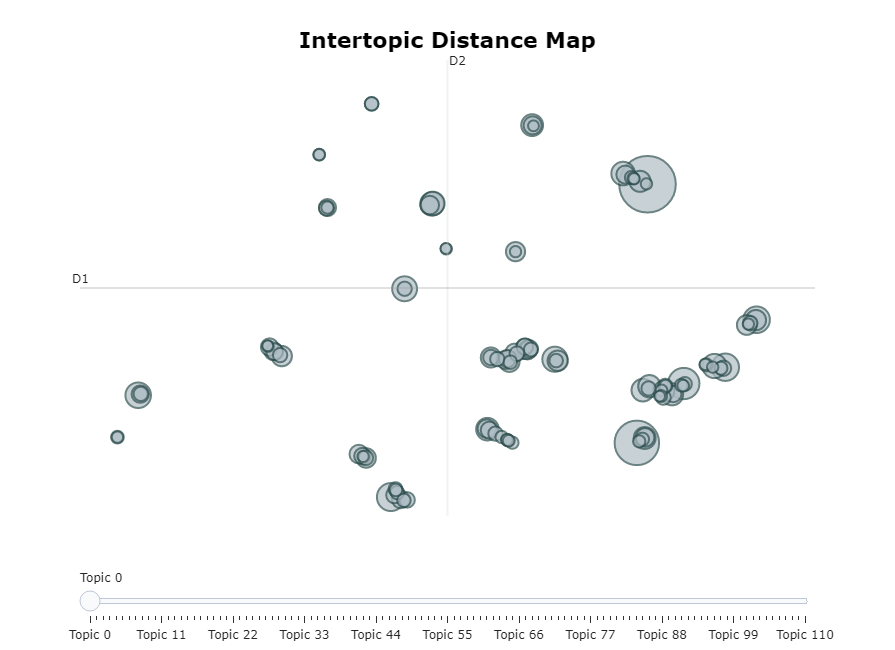

In [743]:
category_topic_model.visualize_topics()

In [728]:
category_topic_model.get_topic(110)

[('friendship', 0.7048781820127037),
 ('sharing', 0.2555179659913932),
 ('loneliness', 0.2555179659913932),
 ('interaction', 0.2555179659913932),
 ('friendships', 0.2555179659913932),
 ('amitié', 0.2555179659913932),
 ('interpersonal', 0.21550362624292035),
 ('friends', 0.21550362624292035),
 ('female', 0.1924020919881713),
 ('best', 0.1924020919881713)]

In [729]:
category_corpus = books['category'].unique().tolist()
category_corpus.remove(np.nan)
len(category_corpus)

4105

In [730]:
category_topic_modeling = pd.DataFrame({'category': category_corpus, 'category_topic' : topics})
category_topic_modeling.head()

,category,category_topic
0,actresses,108
1,1940 1949,68
2,medical,6
3,fiction,33
4,history,21


In [731]:
category_topic_info = category_topic_model.get_topic_info()[['Topic', 'Name']]
category_topic_info.columns = ['category_topic', 'category_topic_name']
category_topic_modeling = pd.merge(category_topic_info, category_topic_modeling, on='category_topic', how='inner')

In [732]:
category_topic_modeling.to_csv('../data/category_toic_modeling_112.csv', index=False)

### Merge Data

In [278]:
summary_topic_modeling = pd.read_csv('../data/summary_topic_modeling_350.csv')
category_topic_modeling = pd.read_csv('../data/category_toic_modeling_112.csv')

In [281]:
books = pd.merge(books, summary_topic_modeling, on='summary', how='left')
books.head(n=3)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,summary_topic,summary_topic_name
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,collins,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN,NaN
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,perennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg,NaN,NaN
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,farrar straus giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg,NaN,NaN


In [282]:
books = pd.merge(books, category_topic_modeling, on='category', how='left')
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,summary_topic,summary_topic_name,category_topic,category_topic_name
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,collins,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN,NaN,NaN,NaN
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,perennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg,NaN,NaN,NaN,NaN
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,farrar straus giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg,NaN,NaN,NaN,NaN
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,putnam,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg,NaN,NaN,NaN,NaN
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,berkley,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg,NaN,NaN,NaN,NaN


In [283]:
books.isna().sum()

isbn                        0
book_title                  0
book_author                 0
year_of_publication         0
publisher                   0
img_url                     0
language                67227
category                68851
summary                 67227
img_path                    0
summary_topic           81971
summary_topic_name      81971
category_topic         149570
category_topic_name    149570
dtype: int64

In [284]:
modify_category = books[(books['category_topic'].isna())&(books['summary_topic'].notnull())]['summary_topic'].values
modify_category

array([7., 7., 7., ..., 7., 7., 7.])

### ISBN

In [79]:
books=books_v5_merge

In [80]:
# img_url에 있는 isbn으로 대체
books['isbn'] = books['img_url'].apply(lambda x: x.split('P/')[1][:10])

In [81]:
# 앞에 2자리 (국가), 4자리 (출판사)
# 국가+출판사 카테고리 따로 만듦
books['country_publisher_code'] = books['isbn'].apply(lambda x:x[:6])

In [82]:
books['country_publisher_code'].nunique()

14826

In [85]:
books.publisher.nunique()

940

## 2. Ratings

In [290]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149570 entries, 0 to 149569
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   isbn                    149570 non-null  object 
 1   book_title              149570 non-null  object 
 2   book_author             149570 non-null  object 
 3   year_of_publication     149570 non-null  float64
 4   publisher               149570 non-null  object 
 5   img_url                 149570 non-null  object 
 6   language                82343 non-null   object 
 7   category                80719 non-null   object 
 8   summary                 82343 non-null   object 
 9   img_path                149570 non-null  object 
 10  summary_topic           67599 non-null   float64
 11  summary_topic_name      67599 non-null   object 
 12  category_topic          0 non-null       float64
 13  category_topic_name     0 non-null       object 
 14  country_publisher_co

In [291]:
train_ratings.head()

,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9


In [292]:
train_ratings['user_id'].nunique()

59803

In [293]:
train_ratings.shape

(306795, 3)

In [294]:
train_ratings['rating'].value_counts(True)

8     0.239877
7     0.172519
9     0.158650
10    0.139422
6     0.082501
5     0.045995
1     0.043185
2     0.042142
4     0.041419
3     0.034290
Name: rating, dtype: float64

In [295]:
train_ratings.groupby('user_id')['rating'].count().sort_values(ascending=False)

user_id
11676     5520
98391     4560
189835    1503
153662    1496
23902      956
          ... 
47317        1
150670       1
150676       1
150677       1
138957       1
Name: rating, Length: 59803, dtype: int64

In [313]:
books = books.rename(columns={'category_topic':'category', 'summary_topic':'summary', 'country_publisher_code' : 'language'})

In [314]:
books

,isbn,book_title,book_author,year_of_publication,publisher,summary,category,language
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,collins,NaN,NaN,000200
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,perennial,NaN,NaN,006097
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,farrar straus giroux,NaN,NaN,037415
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,putnam,NaN,NaN,039913
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,berkley,NaN,NaN,042517
...,...,...,...,...,...,...,...,...
149565,067161746X,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987.0,pocket,NaN,NaN,067161
149566,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,broadway,NaN,NaN,076790
149567,0884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,bridge publications,7.0,NaN,088415
149568,0912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,west,NaN,NaN,091233


### Final Data

In [315]:
path = '../data/'
version = 'v1'
users.to_csv(path + f"users_{version}.csv", index=False)
books.to_csv(path + f"books_{version}.csv", index=False)